Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
from scipy.integrate import solve_ivp
from scipy.optimize import minimize_scalar

Defining all the functions

In [2]:
def ode(t,x,T):
    """
    All Ordinary different equations (ODE) of the series reaction

    Inputs:
    1) t : Time
    2) x : Initial concentrations of A,B, and C
    3) T : Temperature

    Output:
    1) dAdt : Rate equation of A
    2) dBdt : Rate equation of B
    3) dCdt : Rate equation of c
    """
    k1 = k(T)
    k1,k2 = k1[0],k1[1]
    A,B,C = x[0],x[1],x[2]
    dAdt = - k1*A
    dBdt = k1*A - k2*B
    dCdt = k2*B
    return[dAdt,dBdt,dCdt]

def k(T):
    """
    Rate constants

    Inputs:
    1) T : Temperature

    Outputs:
    1) k1 : Rate constant K1
    1) k2 : Rate constant K2
    """
    k1 = 4000*m.exp(-2500/T)
    k2 = 620000*m.exp(-5000/T)
    return [k1,k2]

def objective(T,t_bound,x0):
    """
    Objective function that returns the negative value of concentration of B at end of the time
    (Objective is to maximize B, minimization of -B gives maximum)

    Inputs:
    1) T : Temperature
    2) t_bound : List containing start and end time
    3) x0 : list containing initial concentrations of A,B, and C

    Output:
    1) -sol.y[1][-1] : Negative value of concentration of B at end of the time
    """
    tspan = np.linspace(t_bound[0],t_bound[1],10000)
    sol = solve_ivp(fun=lambda t,y: ode(t,y,T),t_span = t_bound,y0 = x0,t_eval=tspan)
    return -sol.y[1][-1]

In [3]:
# Defining start time and end time
t_bound = np.array([0,1])
# Creating intervals between start and end time
tspan = np.linspace(t_bound[0],t_bound[1],10000)
# Defining initial concentrations of A,B, and C
x0 = [1,0,0]

In [4]:
# Minimizing the objective function
res = minimize_scalar(fun= lambda T: objective(T,t_bound,x0),bounds=(298,399),method='bounded')
#  Optimum Temperature 
T_final = round(res.x)

Temperature at which max B is 333 and the value of B is 0.7850


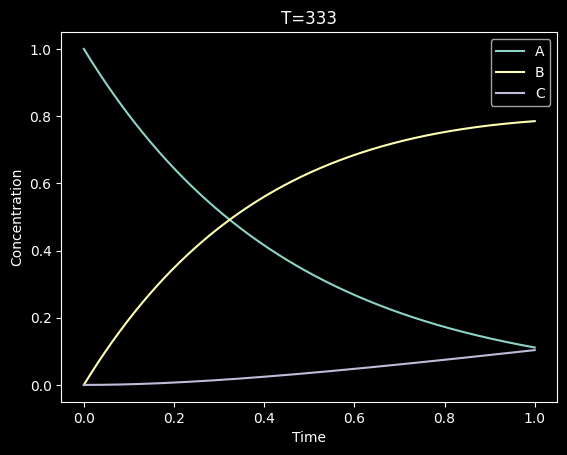

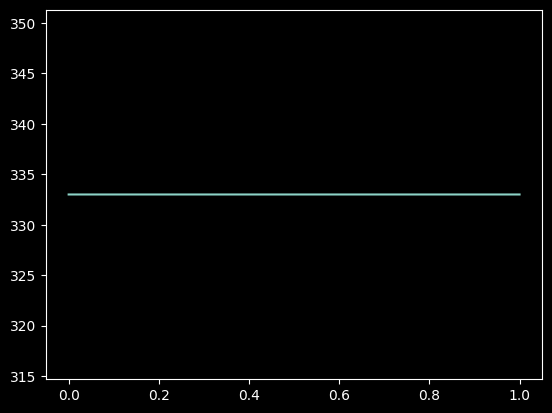

In [7]:
# Solving ODEs at the optimum temperature
exp = solve_ivp(fun= lambda t,y: ode(t,y,T_final),t_span=t_bound,y0=x0,t_eval=tspan)
t = exp.t # Time intervals
A = exp.y[0] # Concentration of A over time
B = exp.y[1] # Concentration of B over time
C = exp.y[2] # Concentration of C over time
print(f'Temperature at which max B is {T_final} and the value of B is {B[-1]:.4f}')

# Plotting
plt.figure(1)
plt.plot(t,A,label='A')
plt.plot(t,B,label='B')
plt.plot(t,C,label='C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('T=333')
plt.legend()
# plt.grid()
plt.show()